# Registry Demo

## Setup
The file registry API is just "import registry".  You also set a variable to point to where the global catalog of all known storage buckets (AWS S3 buckets) exist.  This is an index catalog that points to, basically, all known HelioClouds.

In [1]:
%pip install cdflib --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import scregistry
import cdflib
import matplotlib.pyplot as plt
from pprint import pprint

## Params

In [5]:
cr=scregistry.CatalogRegistry()
cat = cr.get_catalog()
print("get_catalog",cat)
reg = cr.get_registry()
print("get_registry:",reg)
link = cr.get_entries()
print("get_entries:",link)
url = cr.get_endpoint("HelioCloud, including SDO")
print("get_endpoint:",url)

get_catalog {'CloudMe': '0.1', 'modificationDate': '2022-01-01T00:00Z', 'registry': [{'endpoint': 's3://helio-public/', 'name': 'GSFC HelioCloud Public Temp', 'region': 'us-east-1'}, {'endpoint': 's3://gov-nasa-hdrl-data1/', 'name': 'HelioCloud, including SDO', 'region': 'us-east-1'}]}
get_registry: [{'endpoint': 's3://helio-public/', 'name': 'GSFC HelioCloud Public Temp', 'region': 'us-east-1'}, {'endpoint': 's3://gov-nasa-hdrl-data1/', 'name': 'HelioCloud, including SDO', 'region': 'us-east-1'}]
get_entries: {'endpoint': 's3://helio-public/', 'name': 'GSFC HelioCloud Public Temp', 'region': 'us-east-1'}
get_endpoint: s3://gov-nasa-hdrl-data1/


## Searching for data with EntireCatalogSearch

This initial search accesses each HelioCloud's specific data holdings to create what you probably want, which is a list of all datasets available within the entire HelioCloud ecosystem.

We include an example of a down or de-registered catalog to emphasize this index catalog points to HelioClouds, but doesn't manage them.



In [6]:
search = scregistry.EntireCatalogSearch()

Now let us do something useful-- look for MMS1 FEEPS data, or ion data, or other items of interest.

In [7]:
search.search_by_id('mms1_feeps')

[{'id': 'mms1_feeps_brst_electron',
  'index': 's3://helio-public/MMS/mms1/feeps/brst/l2/electron/',
  'title': 'mms1/feeps/brst/l2/electron/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf',
  'description': 'Optional description for dataset',
  'resource': 'optional identifier e.g. SPASE ID',
  'creation': '2023-04-05T00:00:00Z',
  'citation': 'optional how to cite this dataset, DOI or similar',
  'contact': 'optional contact info, SPASE ID, email, or ORCID',
  'about': 'optional website URL for info, team, etc'},
 {'id': 'mms1_feeps_brst_ion',
  'index': 's3://helio-public/MMS/mms1/feeps/brst/l2/ion/',
  'title': 'mms1/feeps/brst/l2/ion/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms1_feeps_srvy_electron',
  'index': 's3://helio-public/MMS/mms1/feeps/srvy/l2

In [8]:
search.search_by_id('srvy_ion')

[{'id': 'mms1_feeps_srvy_ion',
  'index': 's3://helio-public/MMS/mms1/feeps/srvy/l2/ion/',
  'title': 'mms1/feeps/srvy/l2/ion/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms2_feeps_srvy_ion',
  'index': 's3://helio-public/MMS/mms2/feeps/srvy/l2/ion/',
  'title': 'mms2/feeps/srvy/l2/ion/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms3_feeps_srvy_ion',
  'index': 's3://helio-public/MMS/mms3/feeps/srvy/l2/ion/',
  'title': 'mms3/feeps/srvy/l2/ion/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms4_feeps_srvy_ion',
  'index': 's3://helio-public/MMS/mms4/feeps/srvy/l2/ion/',
  'title': 'mms4/feeps/srvy/l2/ion/',
  'start': '2015-06

In [9]:
search.search_by_title('mms1/fpi/b')

[{'id': 'mms1_fpi_brst_des-dist',
  'index': 's3://helio-public/MMS/mms1/fpi/brst/l2/des-dist/',
  'title': 'mms1/fpi/brst/l2/des-dist/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms1_fpi_brst_des-moms',
  'index': 's3://helio-public/MMS/mms1/fpi/brst/l2/des-moms/',
  'title': 'mms1/fpi/brst/l2/des-moms/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms1_fpi_brst_dis-dist',
  'index': 's3://helio-public/MMS/mms1/fpi/brst/l2/dis-dist/',
  'title': 'mms1/fpi/brst/l2/dis-dist/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms1_fpi_brst_dis-moms',
  'index': 's3://helio-public/MMS/mms1/fpi/brst/l2/dis-moms/',
  'title': 'mms1/fpi/brs

In [10]:
search.search_by_title('des-dist')[:2]

[{'id': 'mms1_fpi_brst_des-dist',
  'index': 's3://helio-public/MMS/mms1/fpi/brst/l2/des-dist/',
  'title': 'mms1/fpi/brst/l2/des-dist/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms1_fpi_fast_des-dist',
  'index': 's3://helio-public/MMS/mms1/fpi/fast/l2/des-dist/',
  'title': 'mms1/fpi/fast/l2/des-dist/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'}]

In [11]:
search.search_by_keywords(['mms2', 'brst', 'apples'])[:3]

[{'id': 'mms2_feeps_brst_electron',
  'index': 's3://helio-public/MMS/mms2/feeps/brst/l2/electron/',
  'title': 'mms2/feeps/brst/l2/electron/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms2_feeps_brst_ion',
  'index': 's3://helio-public/MMS/mms2/feeps/brst/l2/ion/',
  'title': 'mms2/feeps/brst/l2/ion/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'},
 {'id': 'mms2_fgm_brst',
  'index': 's3://helio-public/MMS/mms2/fgm/brst/l2/',
  'title': 'mms2/fgm/brst/l2/',
  'start': '2015-06-01T00:00:00Z',
  'stop': '2021-12-31T23:59:00Z',
  'modification': '2023-03-08T00:00:00Z',
  'indextype': 'csv',
  'filetype': 'cdf'}]

## Working with the global catalog (..the name)
This is primarily for admins and people looking for background information on other HelioClouds (rather than on other datasets).


In [12]:
cr = scregistry.CatalogRegistry()

In [13]:
cr.get_catalog()

{'CloudMe': '0.1',
 'modificationDate': '2022-01-01T00:00Z',
 'registry': [{'endpoint': 's3://helio-public/',
   'name': 'GSFC HelioCloud Public Temp',
   'region': 'us-east-1'},
  {'endpoint': 's3://gov-nasa-hdrl-data1/',
   'name': 'HelioCloud, including SDO',
   'region': 'us-east-1'}]}

In [14]:
cr.get_registry()

[{'endpoint': 's3://helio-public/',
  'name': 'GSFC HelioCloud Public Temp',
  'region': 'us-east-1'},
 {'endpoint': 's3://gov-nasa-hdrl-data1/',
  'name': 'HelioCloud, including SDO',
  'region': 'us-east-1'}]

In [15]:
cr.get_entries()

{'endpoint': 's3://helio-public/',
 'name': 'GSFC HelioCloud Public Temp',
 'region': 'us-east-1'}

In [16]:
endpoint = cr.get_endpoint('GSFC HelioCloud Public Temp')
endpoint

's3://helio-public/'

In [17]:
cr.catalog

{'CloudMe': '0.1',
 'modificationDate': '2022-01-01T00:00Z',
 'registry': [{'endpoint': 's3://helio-public/',
   'name': 'GSFC HelioCloud Public Temp',
   'region': 'us-east-1'},
  {'endpoint': 's3://gov-nasa-hdrl-data1/',
   'name': 'HelioCloud, including SDO',
   'region': 'us-east-1'}]}

## Working with a local catalog
Here we browse all the data holdings within a specific disk.

In [18]:
cr = scregistry.CatalogRegistry()
endpoint = cr.get_endpoint('GSFC HelioCloud Public Temp')
fr = scregistry.FileRegistry(endpoint, cache=True)                          

In [19]:
fr.get_catalog()

{'Cloudy': '0.2',
 'endpoint': 's3://helio-public/',
 'name': 'GSFC HelioCloud',
 'contact': 'Dr. Contact, dr_contact@example.com',
 'description': 'Optional description of this collection',
 'citation': 'Optional how to cite, preferably a DOI for the server',
 'catalog': [{'id': 'mms1_feeps_brst_electron',
   'index': 's3://helio-public/MMS/mms1/feeps/brst/l2/electron/',
   'title': 'mms1/feeps/brst/l2/electron/',
   'start': '2015-06-01T00:00:00Z',
   'stop': '2021-12-31T23:59:00Z',
   'modification': '2023-03-08T00:00:00Z',
   'indextype': 'csv',
   'filetype': 'cdf',
   'description': 'Optional description for dataset',
   'resource': 'optional identifier e.g. SPASE ID',
   'creation': '2023-04-05T00:00:00Z',
   'citation': 'optional how to cite this dataset, DOI or similar',
   'contact': 'optional contact info, SPASE ID, email, or ORCID',
   'about': 'optional website URL for info, team, etc'},
  {'id': 'mms1_feeps_brst_ion',
   'index': 's3://helio-public/MMS/mms1/feeps/brst/l2/

# Useful search
Given a dataset ID (from searching above or by knowing a dataset name from another catalog or search tool or even email), we can get a list of files for our desired dataset within our desired timespan.

In [20]:
fr_id1 = 'mms1_feeps_brst_electron'
fr_id2 = 'mmm2_feeps_brst_electron'
start_date = '2020-02-01T00:00:00Z'
stop_date =   '2020-02-02T00:00:00Z'

Each dataset has metadata (in JSON format) providing additional information.  Here is an example.

In [21]:
pprint(fr.get_entry(fr_id1))

{'about': 'optional website URL for info, team, etc',
 'citation': 'optional how to cite this dataset, DOI or similar',
 'contact': 'optional contact info, SPASE ID, email, or ORCID',
 'creation': '2023-04-05T00:00:00Z',
 'description': 'Optional description for dataset',
 'filetype': 'cdf',
 'id': 'mms1_feeps_brst_electron',
 'index': 's3://helio-public/MMS/mms1/feeps/brst/l2/electron/',
 'indextype': 'csv',
 'modification': '2023-03-08T00:00:00Z',
 'resource': 'optional identifier e.g. SPASE ID',
 'start': '2015-06-01T00:00:00Z',
 'stop': '2021-12-31T23:59:00Z',
 'title': 'mms1/feeps/brst/l2/electron/'}


Now we get the actual filelist of dataitems for our given instrument in our given time range.

In [22]:
file_registry1 = fr.request_file_registry(fr_id1, start_date=start_date, stop_date=stop_date, overwrite=False)

In [23]:
file_registry1

,start,datakey,filesize
590,2020-02-01 07:55:23,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,1521034
591,2020-02-01 08:17:13,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3166628
592,2020-02-01 08:19:23,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3166628
593,2020-02-01 08:21:33,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3166628
594,2020-02-01 08:23:43,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3396580
595,2020-02-01 08:26:03,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3166628
596,2020-02-01 08:28:13,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3159442
597,2020-02-01 08:30:23,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3152256
598,2020-02-01 08:37:13,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3396580
599,2020-02-01 08:39:33,s3://helio-public/MMS/mms1/feeps/brst/l2/elect...,3396580


# Operating on files in bulk
Here we can view metadata about the files, or plot them and otherwise extract data from them.

First, some simple metadata.

In [24]:
print('Python Hash of File | Start Date | File Size')
fr.stream(file_registry1, lambda bo, d, f: print(hash(bo.read()), d.replace(' ', 'T')+'Z', f))

Python Hash of File | Start Date | File Size
-7454195335779787565 2020-02-01T07:55:23Z 1521034
37366710091870689 2020-02-01T08:17:13Z 3166628
6053936089634804717 2020-02-01T08:19:23Z 3166628
-2000760673635078210 2020-02-01T08:21:33Z 3166628
-8408485283201274088 2020-02-01T08:23:43Z 3396580
2026235274828778393 2020-02-01T08:26:03Z 3166628
-848379977666020218 2020-02-01T08:28:13Z 3159442
-4580867094987822840 2020-02-01T08:30:23Z 3152256
-780645085643057323 2020-02-01T08:37:13Z 3396580
-3262369754521248414 2020-02-01T08:39:33Z 3396580
7003013804057580769 2020-02-01T08:41:53Z 3403766
-7884214728542563490 2020-02-01T08:44:13Z 3396580
-2426488048073771974 2020-02-01T08:46:33Z 3396580
6332623149964127355 2020-02-01T08:48:53Z 3389394


We define a plotting routine for CDF files here. You can (as with any code) define whatever functions you want to rip through each datafile.  We chose to plot it for this demo to show the data is accessed via S3 and loaded into this program without having to copy any files around.

In [44]:
def plot_cdf(s3_uri, d, f):
    print("fetching ",s3_uri)
    #print(len(cdflib.CDF(s3_uri).cdf_info()["zVariables"]), d.replace(' ', 'T')+'Z', f)

    cdf = cdflib.CDF(s3_uri)

    # Get the variable name and its data
    #var_name = cdf.cdf_info()["zVariables"][2]
    #var_data = cdf.varget(var_name)
    var_data = cdf.varget(1)
    var_name="data"
    # Plot the variable
    plt.figure()
    plt.plot(var_data)
    plt.xlabel("Index")
    plt.ylabel(var_name)
    plt.title(f"Plot of {var_name}")
    plt.show()


# The real stuff

This is our simple runner that takes the entire file registry and runs the plot command.  (You can also pull a subset of the registry e.g.  file_registry1[:2] would pull only the 1st two files).

Note this is temporarily commented out because the current 'cdflib' is not S3-aware.  Later builds will fix this.

# of zVariables | Start Date | File Size
fetching  s3://helio-public/MMS/mms1/feeps/brst/l2/electron/2020/02/mms1_feeps_brst_l2_electron_20200201075523_v6.1.1.cdf


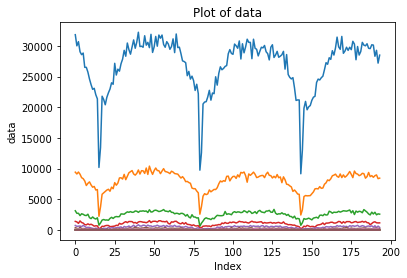

fetching  s3://helio-public/MMS/mms1/feeps/brst/l2/electron/2020/02/mms1_feeps_brst_l2_electron_20200201081713_v6.1.1.cdf


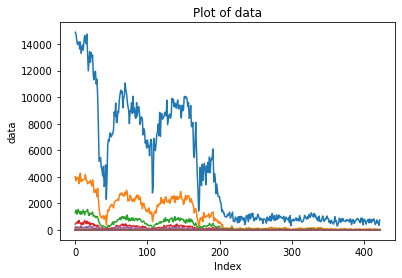

In [45]:
print('# of zVariables | Start Date | File Size')
fr.stream_uri(file_registry1[:2], lambda s3_uri, d, f: plot_cdf(s3_uri, d, f))

That's it: find a dataset, get a list of files for a given time range, and operate on all the files in bulk.